# Exploratory analysis and Random Forests

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
import numpy as np


# Machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error


# Random Forest Specific
from sklearn.ensemble import RandomForestRegressor


# Charts
%matplotlib inline
import pydotplus
from IPython.display import Image
# import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# create function to ore arrange order of columns automatically
def movecol(df, cols_to_move=[], ref_col='', place='After'):
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    return(df[seg1 + seg2 + seg3])

# Exploratory Analysis

In [3]:
# Import csv file with tweets for elon musk
file_name='final_data_frame.csv'
file_path=Path(f"../Resources/{file_name}")
tweets_df = pd.read_csv(file_path, parse_dates=True, infer_datetime_format=True)
tweets_df.rename(columns={'Unnamed: 0': 'date' }, inplace=True)
tweets_df.set_index('date', inplace=True)
tweets_df.head(5)


,TSLA,QQQ,Y_d1_pr_change_diff,Y_d5_pr_change_diff,quarterly report announcement flag,tweet count,number likes,number replies,number retweets clean,compound,...,mars,time,rocket,engine,soon,tesla,spacex,keyword strength,keyword flag,tweet flag
date,,,,,,,,,,,,,,,,,,,,,
2010-06-29,4.778,39.031284,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2010-06-30,4.766,38.437302,0.012707,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2010-07-01,4.392,38.329292,-0.075662,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2010-07-02,3.840,38.221321,-0.122866,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2010-07-06,3.222,38.338306,-0.163998,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
tweets_df.columns

Index(['TSLA', 'QQQ', 'Y_d1_pr_change_diff', 'Y_d5_pr_change_diff',
       'quarterly report announcement flag', 'tweet count', 'number likes',
       'number replies', 'number retweets clean', 'compound', 'positive',
       'negative', 'neutral', 'sentiment', 'model 3', 'coming soon',
       'next week', 'next year', 'falcon 9', 'falcon heavy', 'model x',
       'next month', 'space station', 'sustainable energy', 'electric car',
       'climate change', 'software update', 'dual motor', 'self-driving',
       'giga berlin', 'solar power', 'launch', 'production', 'starship',
       'mars', 'time', 'rocket', 'engine', 'soon', 'tesla', 'spacex',
       'keyword strength', 'keyword flag', 'tweet flag'],
      dtype='object')

In [5]:
tweets_df.iloc[:, 14:41].columns

Index(['model 3', 'coming soon', 'next week', 'next year', 'falcon 9',
       'falcon heavy', 'model x', 'next month', 'space station',
       'sustainable energy', 'electric car', 'climate change',
       'software update', 'dual motor', 'self-driving', 'giga berlin',
       'solar power', 'launch', 'production', 'starship', 'mars', 'time',
       'rocket', 'engine', 'soon', 'tesla', 'spacex'],
      dtype='object')

In [6]:
tweets_df['positive'].value_counts()

0.000    1373
0.161      11
0.178      10
0.208      10
0.112      10
         ... 
0.086       1
0.357       1
0.548       1
0.540       1
0.289       1
Name: positive, Length: 410, dtype: int64

In [7]:
tweets_df['negative'].value_counts()

0.000    1737
0.054      14
0.049      14
0.058      14
0.057      14
         ... 
0.292       1
0.147       1
0.158       1
0.236       1
0.306       1
Name: negative, Length: 211, dtype: int64

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

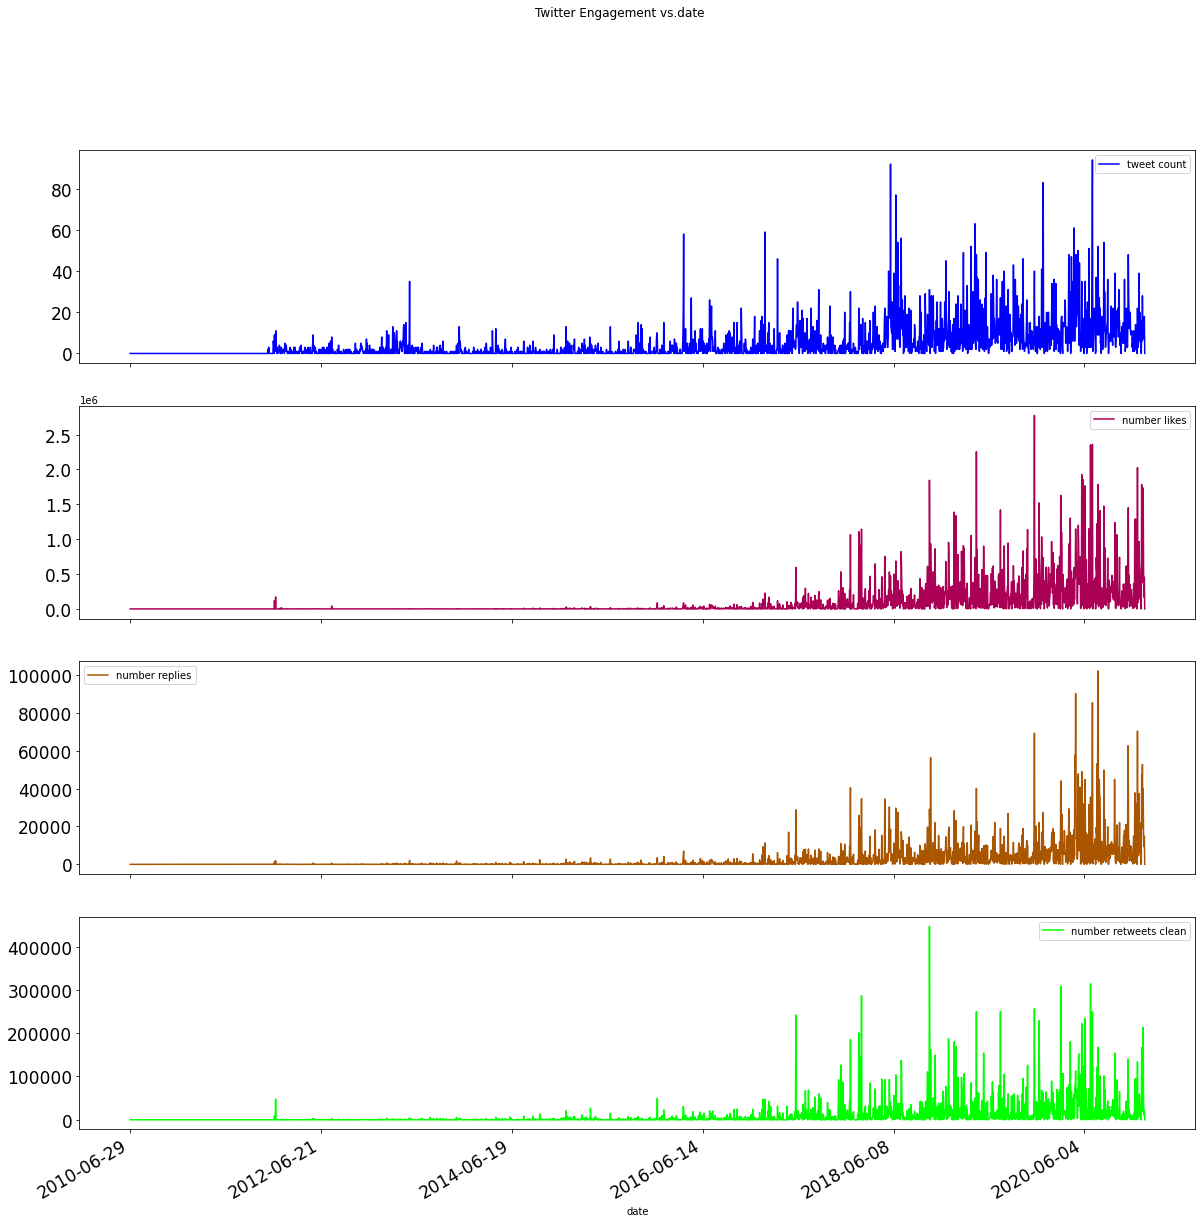

In [8]:
engage_df = tweets_df.iloc[:, 5:9]
engage_df.plot(figsize=(20,20), fontsize=17, subplots=True, colormap='brg', title="Twitter Engagement vs.date")

In [9]:
sent_df = tweets_df[['compound', 'positive','negative', 'neutral', 'sentiment', 'TSLA','QQQ']]
sent_df

,compound,positive,negative,neutral,sentiment,TSLA,QQQ
date,,,,,,,
2010-06-29,0.0000,0.000,0.000,0.000,0,4.778000,39.031284
2010-06-30,0.0000,0.000,0.000,0.000,0,4.766000,38.437302
2010-07-01,0.0000,0.000,0.000,0.000,0,4.392000,38.329292
2010-07-02,0.0000,0.000,0.000,0.000,0,3.840000,38.221321
2010-07-06,0.0000,0.000,0.000,0.000,0,3.222000,38.338306
...,...,...,...,...,...,...,...
2021-01-13,0.5226,0.141,0.090,0.769,0,854.409973,316.040009
2021-01-14,0.9357,0.336,0.120,0.545,0,845.000000,314.350006
2021-01-15,0.9429,0.182,0.000,0.818,0,826.159973,311.859985


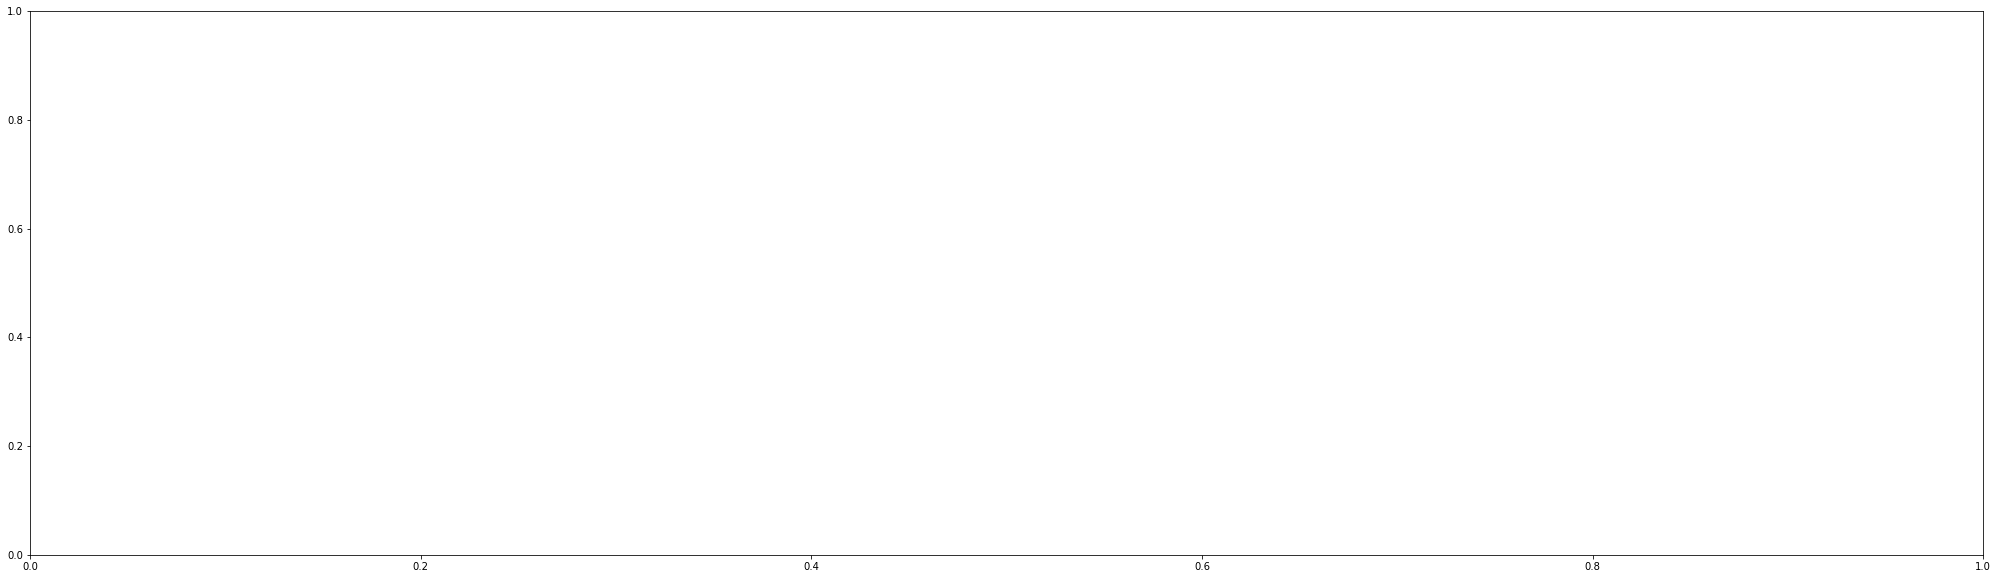

In [10]:
# correlation heatmap
fig, ax = plt.subplots(figsize=(35,10))  
# sns.heatmap(sent_df.corr(), annot=True, linewidth=0.1, ax=ax, square=True, cmap='cool')

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

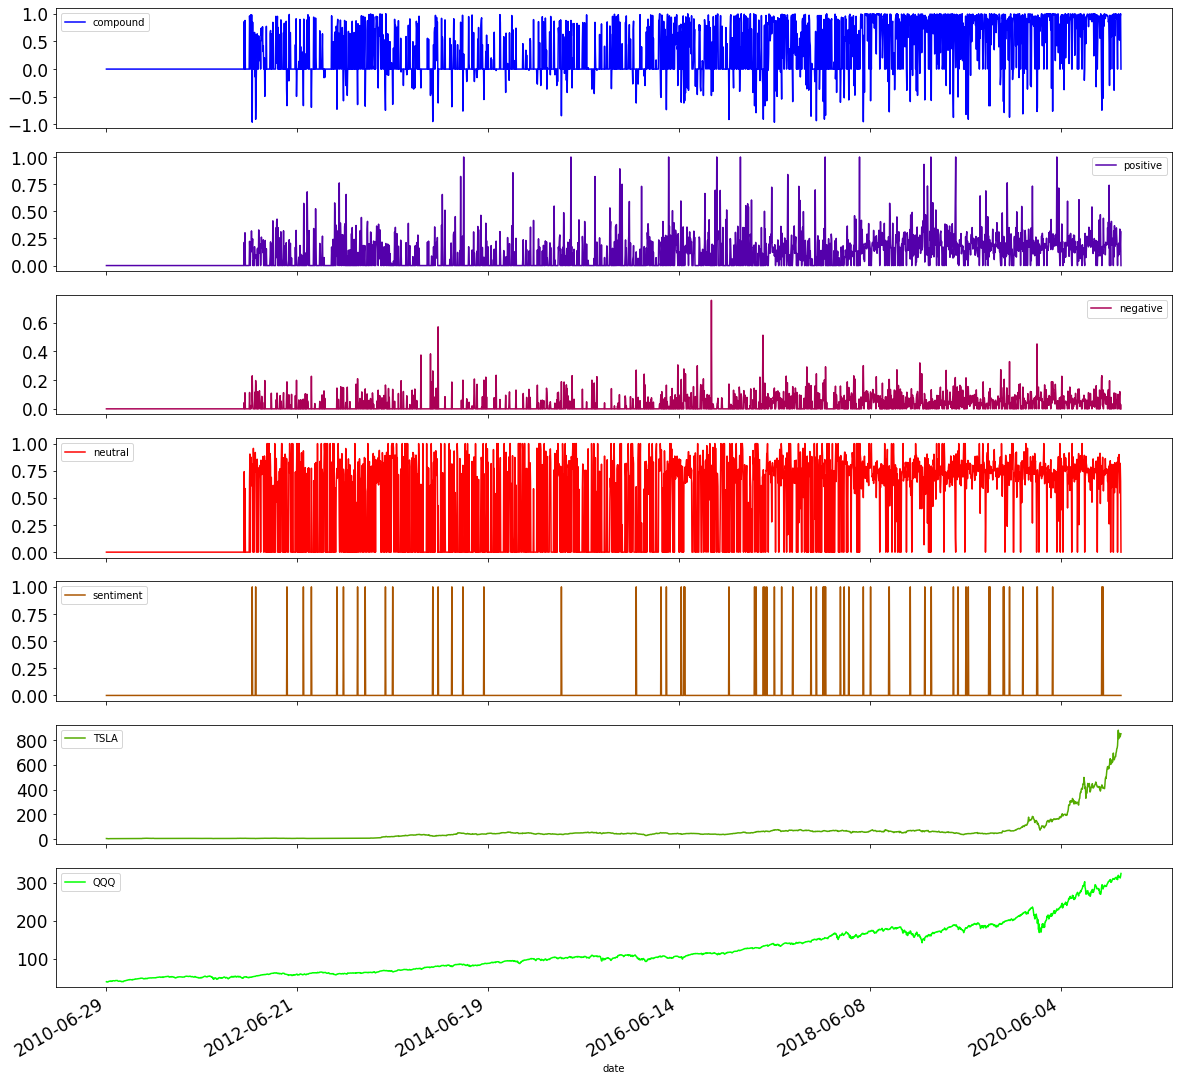

In [11]:
sent_df.plot(figsize=(20,20), fontsize=17, subplots=True, colormap='brg')

In [12]:
sent_df1 = tweets_df[['negative', 'positive']]
print(sent_df1.head(3))
stock_df1 = tweets_df[['TSLA', 'QQQ']]
print(stock_df1.head(3))

            negative  positive
date                          
2010-06-29       0.0       0.0
2010-06-30       0.0       0.0
2010-07-01       0.0       0.0
             TSLA        QQQ
date                        
2010-06-29  4.778  39.031284
2010-06-30  4.766  38.437302
2010-07-01  4.392  38.329292


<AxesSubplot:title={'center':'TSLA & QQQ closing price'}, xlabel='date'>

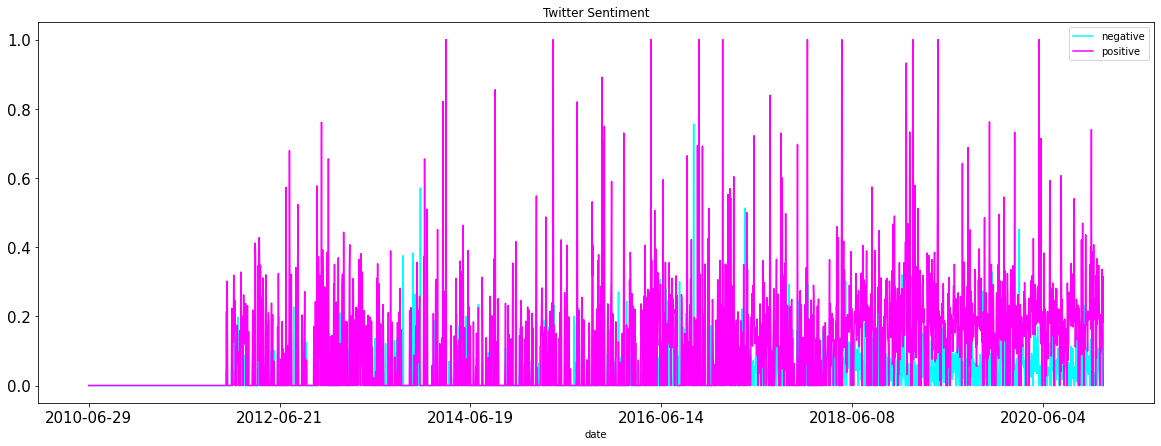

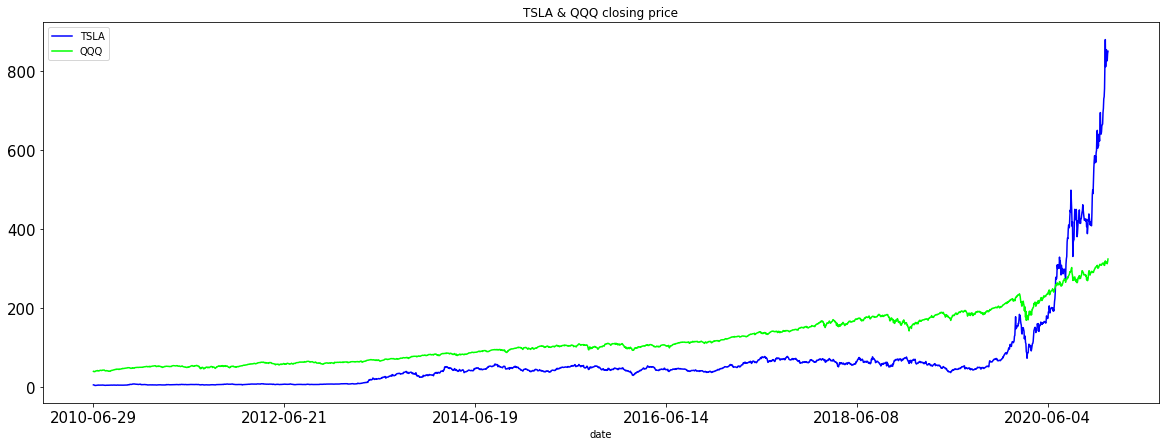

In [13]:
sent_df1.plot(figsize=(20,7), title = "Twitter Sentiment", colormap='cool', fontsize=15)
stock_df1.plot(figsize=(20,7), title = "TSLA & QQQ closing price", colormap='brg',fontsize=15)

In [3]:
# Add a few fields to the whole data frame before dropping NAs etc,
# create fields that will be used in trading algo. Will go to actual_vs_predicted_df 
tweets_df['pct 1d change TSLA']=tweets_df['TSLA'].pct_change()
tweets_df['pct 1d change QQQ']=tweets_df['QQQ'].pct_change()

tweets_df['pct 5d change TSLA']=tweets_df['TSLA'].pct_change(5)
tweets_df['pct 5d change QQQ']=tweets_df['QQQ'].pct_change(5)


# move this variables to the beginning  after columns that will not be used
tweets_df = movecol(tweets_df,cols_to_move=['pct 1d change TSLA', 'pct 1d change QQQ','pct 5d change TSLA', 'pct 5d change QQQ'],ref_col='QQQ',place='After')

#'Create data frame that will hold predicted values
actual_vs_predicted=pd.DataFrame()
tweets_df.head(5)


,TSLA,QQQ,pct 1d change TSLA,pct 1d change QQQ,pct 5d change TSLA,pct 5d change QQQ,Y_d1_pr_change_diff,Y_d5_pr_change_diff,quarterly report announcement flag,tweet count,...,mars,time,rocket,engine,soon,tesla,spacex,keyword strength,keyword flag,tweet flag
date,,,,,,,,,,,,,,,,,,,,,
2010-06-29,4.778,39.031284,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2010-06-30,4.766,38.437302,-0.002512,-0.015218,NaN,NaN,0.012707,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2010-07-01,4.392,38.329292,-0.078472,-0.002810,NaN,NaN,-0.075662,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2010-07-02,3.840,38.221321,-0.125683,-0.002817,NaN,NaN,-0.122866,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2010-07-06,3.222,38.338306,-0.160938,0.003061,NaN,NaN,-0.163998,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Shorten the timeframe of the data 
min_date='2012-01-01'
tweets_df=tweets_df.loc['2012-01-01':]

In [5]:
# Define lists that will be used to iterate through different Ys / features combinations
# two Y variables, 1 day price change difference and 5 day price change difference
# y_variable=['1 day','5 day'] 

# x_variables=['all fields','present']
# define various set of features: all fields = includes variables known at the time of the tweet as well as in the future (likes, retweets, etc);
# Present= includes variables that are only known at the time of the trade 

# We create a toggle to easily switch between the Y fields

y_variable= '1d' 
# Y_variable= '5d' 

x_variable='all'
# x_variables='present'


# Define if statement for Y variables
if y_variable == '1d':
    # cretae a temp data sate dropping NAs     
    temp_df= tweets_df.dropna()
    # create y variable     
    y = temp_df["Y_d1_pr_change_diff"].dropna().ravel()
    
    # we create data frame that will be used to compare predicted versus actuals     
    actual_vs_predicted['y']=temp_df["Y_d1_pr_change_diff"]
    actual_vs_predicted['pct 1d change QQQ']=temp_df["pct 1d change QQQ"]                                                
    actual_vs_predicted['pct 1d change TSLA']=temp_df["pct 1d change TSLA"]

elif y_variable == '5d':
    # cretae a temp data sate dropping NAs     
    temp_df= tweets_df.dropna()
    # create y variable     
    y = temp_df["Y_d5_pr_change_diff"].ravel()

    # we create data frame that will be used to compare predicted versus actuals     
    actual_vs_predicted['y']=temp_df["Y_d5_pr_change_diff"]
    actual_vs_predicted['pct 5d change QQQ']=temp_df["pct 5d change QQQ"]                                                
    actual_vs_predicted['pct 5d change TSLA']=temp_df["pct 5d change TSLA"]
    
                                                      
# Deftine columns common to every model by copying columns from data frame
x_columns=list(tweets_df.iloc[:,8:].columns)

# Choose features we want to use
if x_variable == 'all':
    columns_to_remove=[]
    for element in columns_to_remove:
        x_columns.remove(element)
    X=temp_df[x_columns]
    
elif x_variable == 'present':
    columns_to_remove=['number likes','number replies', 'number retweets clean']
    for element in columns_to_remove:
        x_columns.remove(element)
    X=temp_df[x_columns]


In [6]:
# REMOVE FROM MAIN CODE
# dropped_na_df = tweets_df.iloc[5:, :]
# dropped_na_df

In [7]:
# REMOVE FROM MAIN CODE
# # Define features set
# X = dropped_na_df.copy()
# X = dropped_na_df.iloc[:, 4:]
# X.head()

In [8]:
# REMOVE FROM MAIN CODE
# # Define target vector
# #y = tweets_df["col"].values.reshape(-1, 1)
# y = dropped_na_df["Y_d5_pr_change_diff"].ravel()
# y

# ASK GROUP: should this be random split or as we did in class activity "Coding_Programs/FINTECH_Columbia/cu-nyc-fin-pt-09-2020-u-c/15-Algorithmic-Trading/3/Activities/02-Ins_Random_Forest_Training/Solved/random_forest_training.ipynb"

In [9]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [10]:
# only `X_train` and `X_testing` DataFrames should be scaled
# Creating StandardScaler instance
scaler = StandardScaler()


In [11]:
# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)
X_scaler

StandardScaler()

In [12]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled)
X_scaled = X_scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=x_columns)
X_scaled

,quarterly report announcement flag,tweet count,number likes,number replies,number retweets clean,compound,positive,negative,neutral,sentiment,...,mars,time,rocket,engine,soon,tesla,spacex,keyword strength,keyword flag,tweet flag
0,-0.124366,0.606109,-0.375702,-0.346794,-0.333551,-2.802155,0.263251,3.181033,0.294467,6.077280,...,-0.241405,2.613480,-0.329305,-0.309250,-0.320489,1.846849,-0.279879,0.386386,1.099218,0.729600
1,-0.124366,-0.334367,-0.378079,-0.352173,-0.343847,1.095686,0.809106,0.398692,0.520910,-0.164547,...,-0.241405,-0.382632,-0.329305,-0.309250,-0.320489,-0.541463,-0.279879,-0.634606,-0.909738,0.729600
2,-0.124366,-0.543362,-0.378185,-0.353197,-0.344234,-0.733384,-0.789470,-0.561297,-1.288028,-0.164547,...,-0.241405,-0.382632,-0.329305,-0.309250,-0.320489,-0.541463,-0.279879,-0.634606,-0.909738,-1.370614
3,-0.124366,-0.229870,-0.378018,-0.348459,-0.340555,-0.046241,-0.503546,-0.561297,1.200238,-0.164547,...,-0.241405,2.613480,-0.329305,-0.309250,-0.320489,-0.541463,-0.279879,1.407379,1.099218,0.729600
4,-0.124366,-0.543362,-0.378185,-0.353197,-0.344234,-0.733384,-0.789470,-0.561297,-1.288028,-0.164547,...,-0.241405,-0.382632,-0.329305,-0.309250,-0.320489,-0.541463,-0.279879,-0.634606,-0.909738,-1.370614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272,-0.124366,0.606109,6.681606,4.782340,6.544500,0.395155,0.126787,0.903093,0.713516,-0.164547,...,4.142412,-0.382632,-0.329305,3.233632,-0.320489,-0.541463,3.572972,1.407379,1.099218,0.729600
2273,-0.124366,0.188120,1.899735,1.509427,0.904862,1.287231,1.393951,1.391223,0.130492,-0.164547,...,4.142412,-0.382632,-0.329305,-0.309250,-0.320489,-0.541463,-0.279879,0.386386,1.099218,0.729600
2274,-0.124366,0.606109,0.311091,0.848211,0.057241,1.302779,0.393216,-0.561297,0.841053,-0.164547,...,-0.241405,-0.382632,-0.329305,3.233632,-0.320489,-0.541463,-0.279879,-0.124110,1.099218,0.729600
2275,-0.124366,1.337591,1.467777,1.549385,0.289496,1.421766,1.263985,-0.056896,0.411593,-0.164547,...,-0.241405,-0.382632,-0.329305,-0.309250,-0.320489,-0.541463,-0.279879,0.386386,1.099218,0.729600


# Test different models

## Random Forest Model
### Fitting the Random Forest Model
#### ASK Group: why do we use 500 as n_estimators?

In [13]:
# Create a random forest instance and train it with the training data (`X_train_scaled` and `y_train`), define `n_estimators=500 (?)` and `random_state=72 (?)`.
# Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)


In [14]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)


## Making Predictions Using the Random Forest Model

In [15]:
# Validate the trained model, by predicting loan defaults using the testing data (`X_test_scaled`).
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)
predictions_train=rf_model.predict(X_train_scaled)


## Model Evaluation
#### MSE for the train data seems 3x MSE for test data, thoughts? 

In [16]:
# Calculating MSE
mse = mean_squared_error(y_test, predictions)
mse_train = mean_squared_error(y_train, predictions_train)

# Displaying results
print(f"MSE test:{mse} // MSE train:{mse_train}")

MSE test:0.0009953869596742745 // MSE train:0.00037389759147046873


## Feature Importance

In [17]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_


In [18]:
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.1464695233054678, 'compound'),
 (0.1371360233773279, 'number likes'),
 (0.12708764853147042, 'number replies'),
 (0.10253377733469538, 'number retweets clean'),
 (0.08981610159070215, 'positive'),
 (0.08707409412947453, 'neutral'),
 (0.06832393836056587, 'tweet count'),
 (0.0597020452654572, 'negative'),
 (0.025745061962669485, 'keyword strength'),
 (0.014092486505817991, 'production'),
 (0.011976150590662418, 'next year'),
 (0.011902984870429095, 'engine'),
 (0.011259559892108435, 'tesla'),
 (0.009587206103893348, 'giga berlin'),
 (0.0088170612649659, 'time'),
 (0.007596550161120214, 'falcon 9'),
 (0.0069258257274045065, 'space station'),
 (0.006883998546018417, 'rocket'),
 (0.006652635985419364, 'soon'),
 (0.006434312267184433, 'electric car'),
 (0.006240698249824458, 'model 3'),
 (0.005825790172907517, 'starship'),
 (0.005595356036666176, 'mars'),
 (0.004920543525235494, 'spacex'),
 (0.00487015566248426, 'launch'),
 (0.004226437774760102, 'quarterly report announcement flag'),
 

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

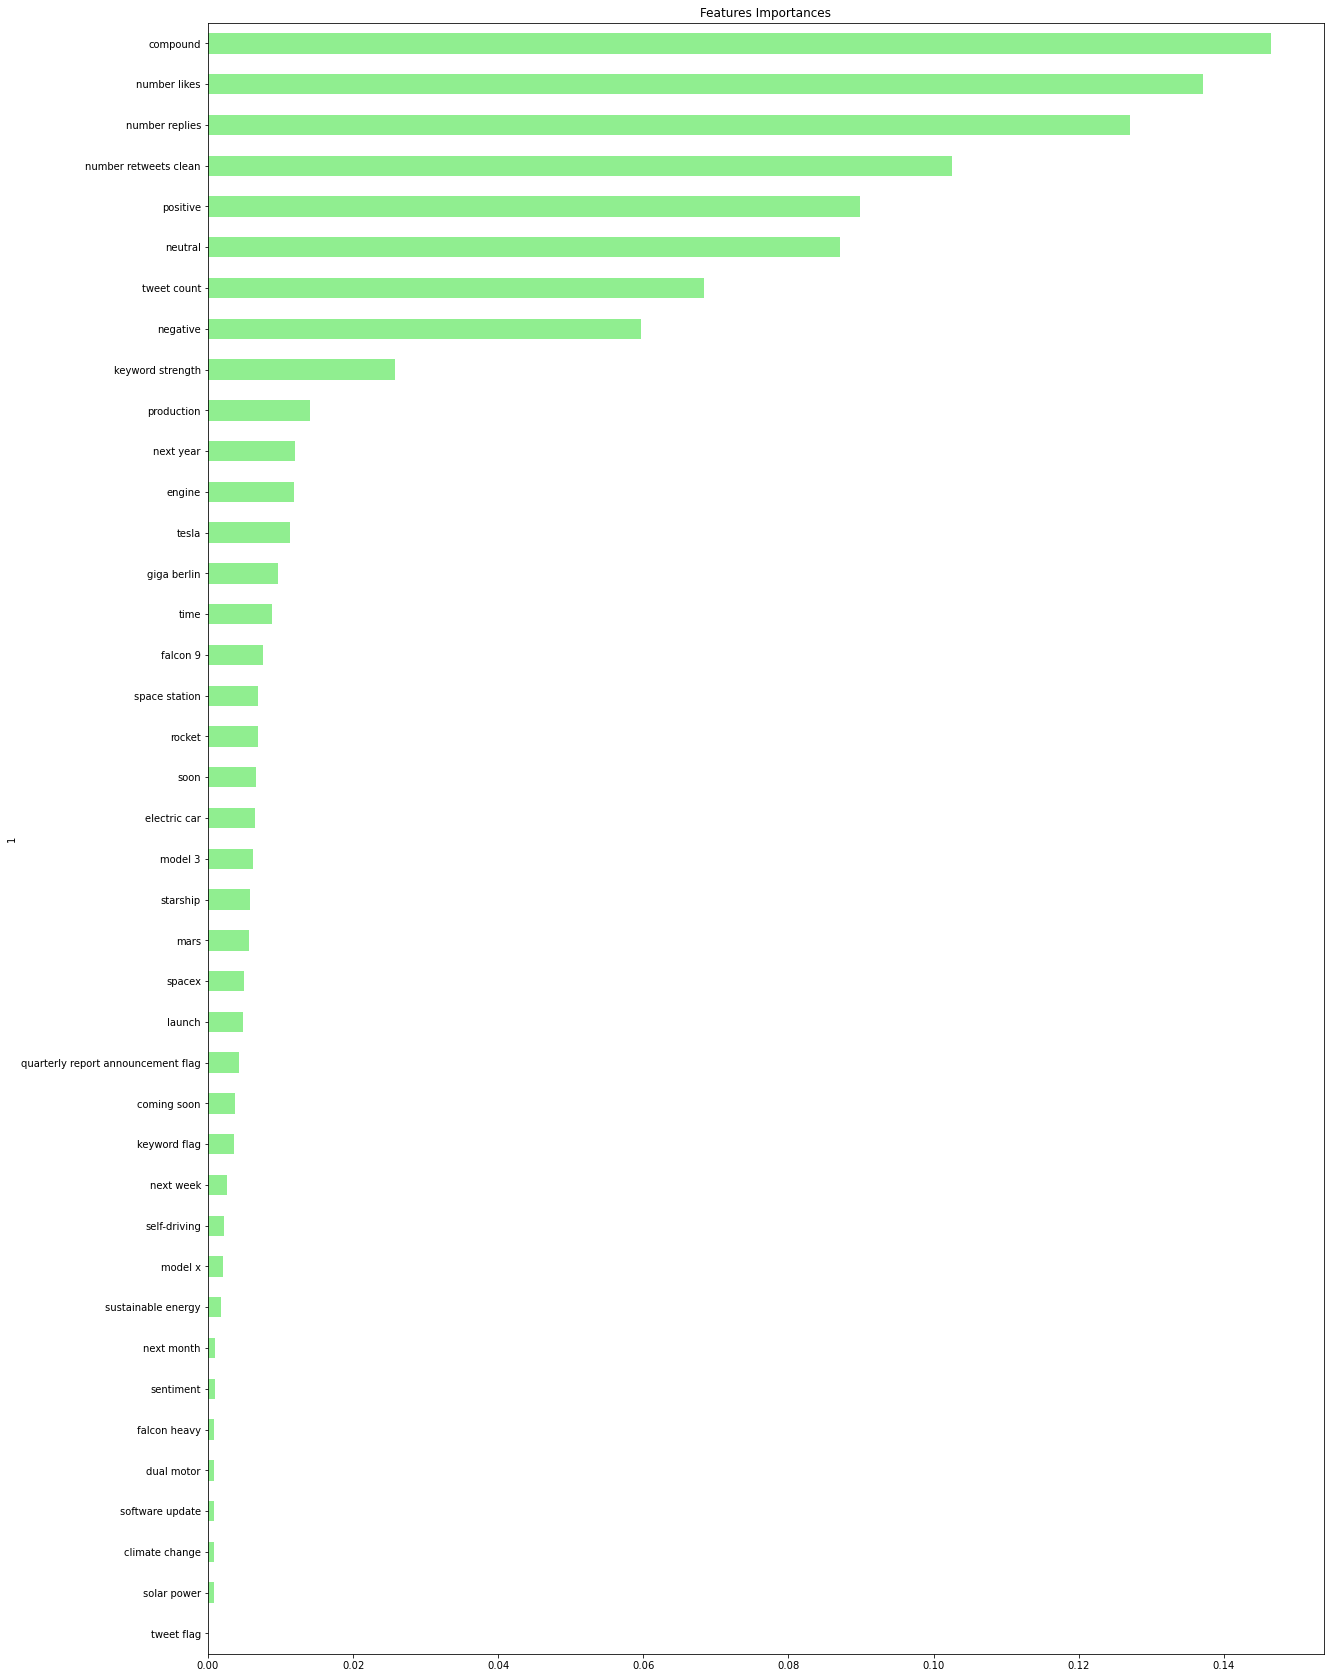

In [19]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', figsize=(20,30), legend=False)


In [28]:
# We add predicted returns to the subset of fields that will allow us to test the predicitons
model='RF'
actual_vs_predicted['Predicted'+' '+model+' '+y_variable+' '+x_variable] = rf_model.predict(X_scaled)
actual_vs_predicted.head()

,y,pct 1d change QQQ,pct 1d change TSLA,Predicted Return,PredictedRandom Forest,Predicted Random Forest,Predicted RF 1 day all fields
date,,,,,,,
2012-01-03,-0.035972,0.019165,-0.016807,0.007032,0.007032,0.007032,0.007032
2012-01-04,-0.017395,0.004218,-0.013177,-0.015061,-0.015061,-0.015061,-0.015061
2012-01-05,-0.029517,0.008225,-0.021292,0.000364,0.000364,0.000364,0.000364
2012-01-06,-0.011215,0.003472,-0.007743,-0.009887,-0.009887,-0.009887,-0.009887
2012-01-09,0.015921,-0.003287,0.012635,0.000364,0.000364,0.000364,0.000364


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

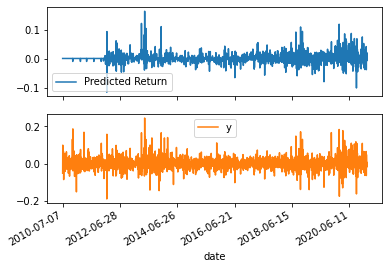

In [33]:
actual_vs_predicted[['Predicted Return','y']].plot(subplots=True)

['PredictedRandom Forest',
 'Predicted Random Forest',
 'Predicted RF 1 day all fields']

In [85]:
# Determine the buy / sell signals based on the regressions obtained from model
# Buy/sell thresholds 
buy_threshold=0.05/100
sell_threshold=-0.05/100

# Deftine columns common to every model by copying columns from odata frame
model_names=list(actual_vs_predicted.iloc[:,4:].columns)
print(model_names)

# Create a data frame with this signals
signal=pd.DataFrame()
for model in model_names:
#     print(model)
#     signal['predictions']=actual_vs_predicted[model]
#     signal[model]=0
#     signal.loc[(signal['predictions']>buy_threshold),signal[model]]=1
#     signal.loc[(signal['predictions']<buy_threshold),signal[model]]=-1
    signal[model]=signal.apply(lambda x: 1 if x['predictions']>buy_threshold else 0, axis=0)

    #     signal[model].loc[(signal['predictions']>buy_threshold)]=1
#     signal[model].loc[signal['predictions']<sell_threshold]=-1


signal.tail(100)
# signal.drop(columns='predictions',inplace=True)
# signal.head()

['PredictedRandom Forest', 'Predicted Random Forest', 'Predicted RF 1 day all fields']


ValueError: Wrong number of items passed 0, placement implies 1

In [81]:
signal

""


In [23]:

file_name="ML_algo.csv"
output_file = Path(f"../Resources/{file_name}")
new.to_csv(f"{output_file}")


In [51]:
actual_vs_predicted.head()

,y,pct 1d change QQQ,pct 1d change TSLA,Predicted Return,PredictedRandom Forest,Predicted Random Forest,Predicted RF 1 day all fields
date,,,,,,,
2012-01-03,-0.035972,0.019165,-0.016807,0.007032,0.007032,0.007032,0.007032
2012-01-04,-0.017395,0.004218,-0.013177,-0.015061,-0.015061,-0.015061,-0.015061
2012-01-05,-0.029517,0.008225,-0.021292,0.000364,0.000364,0.000364,0.000364
2012-01-06,-0.011215,0.003472,-0.007743,-0.009887,-0.009887,-0.009887,-0.009887
2012-01-09,0.015921,-0.003287,0.012635,0.000364,0.000364,0.000364,0.000364
